# Getting started with iGraph

This is the same set of tasks as in `nx.ipynb`, but using the `igraph` library instead.

## Setup

Some necessary imports for tasks in this notebook

In [1]:
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np

# Please add any additional imports you may need here
# (makes it easier to read/follow)

# Uncomment *one* of the two lines below, to choose a Matplotlib backend
# Note that the "widget" interactive backend requires that ipympl and ipywidgets are installed
%matplotlib inline
# %matplotlib widget

## Erdős–Rényi graphs

The next cell is a basic demonstration of how to generate an Erdős–Rényi random graph, using `nx.gnp_random_graph` (as well as how to plot small-ish graphs). Note that there is the very similar `nx.gnm_random_graph` which, instead of probability $p$ of an edge accepts the total number $m$ of edges (these are simply related by $m = pn(n-1)/2$ for undirected graphs).

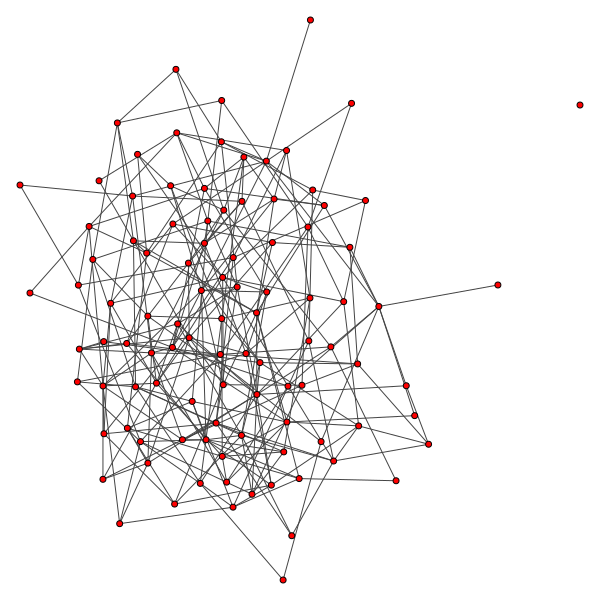

<Figure size 1000x600 with 0 Axes>

In [2]:
Ger: ig.Graph = ig.Graph.Erdos_Renyi(n=100, p=0.05, directed=False)
plt.figure(figsize=(10,6))
ig.plot(Ger, vertex_size=6)

In [3]:
import numpy.typing as npt

# Aux function to extract degree histogram; *could* also use ig.Graph.degree_distribution method,
# but the return type is a little cumbersome to use for what we want to do here...
def degree_histogram(G: ig.Graph) -> npt.NDArray[np.int_]:
  hist = np.zeros(G.vcount(), dtype=np.int_)
  for deg in G.degree():
    hist[deg] += 1
  return hist  # Note that this is not zero-trimmed at the end..

Plot degree histogram of `Ger`

In [4]:
# Plot degree histogram of Ger (variable assigned previously)
plt.figure(figsize=(10, 6))
# Simplest plot (one-liner):
# plt.plot(degree_histogram(Ger))
# ..but we'll make it look a little prettier (not required)
plt.plot(np.trim_zeros(degree_histogram(Ger), 'b'))
plt.xlabel("Degree")
plt.ylabel("Count")

NameError: name 'Ger' is not defined

<Figure size 1000x600 with 0 Axes>

##### **Task 1**

The goal here is to do a simple empirical estimation of the degree distribution for E-R graphs, along with confidence bands.  You can do this with a naive Monte-Carlo estimator, i.e.:

* Generate $S$ different Erdős–Rényi random graphs, all with the same $(N, p)$ parameters.
* For each of those graphs, calculate it's degree histogram (reusing your earlier function)
* Summarize all $S$ histograms using mean and standard deviation.

Note that you don't have to generate all $S$ random graphs at the beginning (since that would require you to store all of them in-memory, which could start becoming intractable for large sample-sizes $S$).  Instead, you can generate one random graph at a time, and then use it's histogram to update sum and sum-of-squares (which can be used to calculate the mean and standard error at the very end).


In [5]:
def er_degree_est(S, N, p):
  """
  Naive Monte-Carlo estimator of E-R graph degree distribution.
  
  Arguments:
    S is the number of random graphs to generate
    N, p are the parameters for the E-R model to generate graphs

  Return value:
    A pair of NumPy vectors, say `(m, e)`, each of length N, where
    m[i] is the average (over the S graphs) count of vertices with degree i,
    and e[i] is the corresponding standard deviation for degree i 
    (again over the same set of S randomly generated E-R graphs).
  """
  # TODO - Fill in code below
import numpy as np
import networkx as nx


N = 100  
p = 0.1  
S = 1000  


max_degree = N - 1  
degree_sums = np.zeros(max_degree + 1)
degree_sums_sq = np.zeros(max_degree + 1)


for _ in range(S):
    
    G = nx.erdos_renyi_graph(N, p)
    
   
    degrees = [d for n, d in G.degree()]
    histogram, _ = np.histogram(degrees, bins=np.arange(-0.5, max_degree + 1.5), density=False)
    
    
    degree_sums += histogram
    degree_sums_sq += histogram**2


mean_degrees = degree_sums / S
std_dev_degrees = np.sqrt((degree_sums_sq / S - mean_degrees**2) / S)


observed_degrees = np.where(degree_sums > 0)[0]
mean_degrees_observed = mean_degrees[observed_degrees]
std_dev_degrees_observed = std_dev_degrees[observed_degrees]

observed_degrees, mean_degrees_observed, std_dev_degrees_observed

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 25], dtype=int64),
 array([4.0000e-03, 3.2000e-02, 1.7400e-01, 6.3900e-01, 1.7760e+00,
        3.6040e+00, 6.1860e+00, 9.2310e+00, 1.1820e+01, 1.3343e+01,
        1.3179e+01, 1.1780e+01, 9.5960e+00, 7.1170e+00, 4.8270e+00,
        3.0730e+00, 1.7740e+00, 9.7700e-01, 4.3700e-01, 2.4400e-01,
        1.1600e-01, 5.3000e-02, 1.1000e-02, 6.0000e-03, 1.0000e-03]),
 array([0.001996  , 0.00556561, 0.0134805 , 0.0252721 , 0.04314886,
        0.06015965, 0.08182545, 0.0943167 , 0.10827557, 0.11266477,
        0.10863222, 0.10512659, 0.09245963, 0.08510764, 0.07267098,
        0.05531429, 0.04292929, 0.0327486 , 0.02111945, 0.01595193,
        0.01060868, 0.00736145, 0.00329833, 0.00244213, 0.0009995 ]))

##### **Task 2**

Finally, use your `er_degree_est()` implementation to generate plots (with error bars or error bands, as you prefer) for graphs with the following $(N, p)$ parameter values:

* $(100, 0.01)$
* $(100, 0.02)$
* $(100, 0.05)$
* $(100, 0.10)$

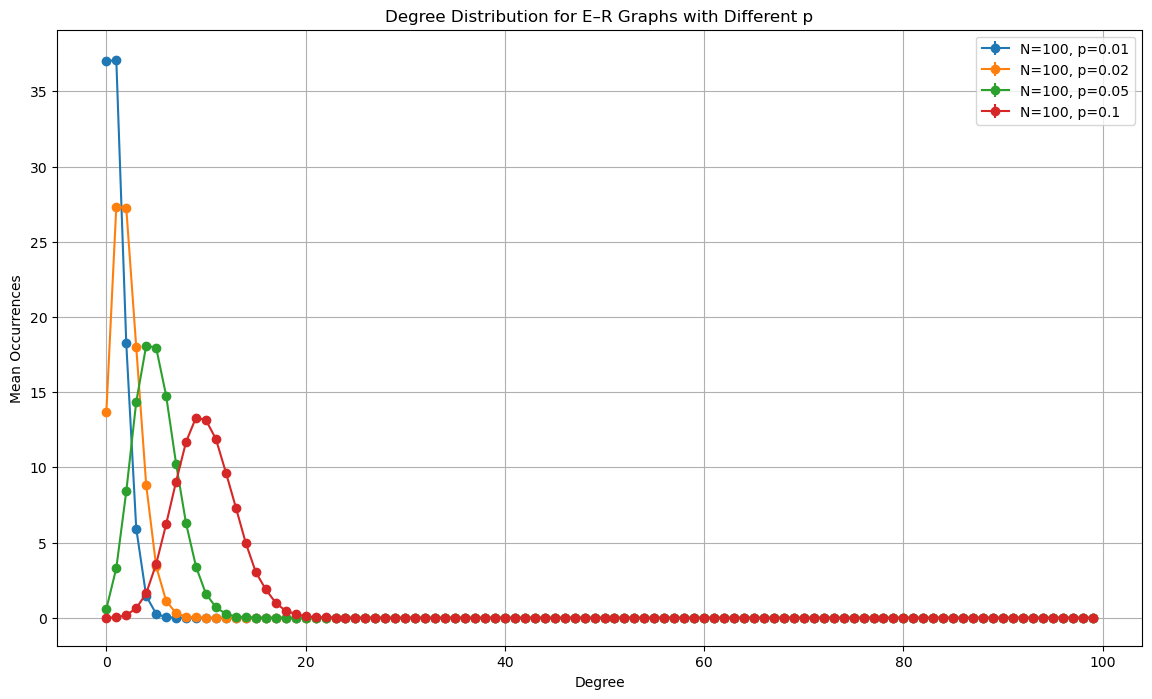

In [6]:
# TODO - Fill in code (feel free to add extra cells, as you see fit)
import matplotlib.pyplot as plt

def er_degree_est(N, p, S=1000):
    """
    Estimate the degree distribution for an Erdős–Rényi graph given parameters N, p, and S.
    """
    max_degree = N - 1
    degree_sums = np.zeros(max_degree + 1)
    degree_sums_sq = np.zeros(max_degree + 1)
    
    for _ in range(S):
        G = nx.erdos_renyi_graph(N, p)
        degrees = [d for n, d in G.degree()]
        histogram, _ = np.histogram(degrees, bins=np.arange(-0.5, max_degree + 1.5), density=False)
        degree_sums += histogram
        degree_sums_sq += histogram**2

    mean_degrees = degree_sums / S
    std_dev_degrees = np.sqrt((degree_sums_sq / S - mean_degrees**2) / S)
    
    return mean_degrees, std_dev_degrees


parameters = [(100, 0.01), (100, 0.02), (100, 0.05), (100, 0.10)]
plt.figure(figsize=(14, 8))

for N, p in parameters:
    mean_degrees, std_dev_degrees = er_degree_est(N, p)
    degrees = np.arange(len(mean_degrees))
    plt.errorbar(degrees, mean_degrees, yerr=std_dev_degrees, fmt='-o', label=f'N={N}, p={p}')

plt.title('Degree Distribution for E–R Graphs with Different p')
plt.xlabel('Degree')
plt.ylabel('Mean Occurrences')
plt.legend()
plt.grid(True)
plt.show()


<hr/>

##### **Task 2** [optional]

Jupyter notebooks are also used to create quick "data dashboards", using a number of interactive plotting libraries, such as IPyWidgets or Bokeh.  For those that wish to explore this (self-directed), we suggest the following as a starter task:

Create an interactive panel (using IPyWidgets), that allows users to change $N$, and $p$ using sliders.  Whenever sliders move, the plot of the degree distribution plot estimate should be auto-updated.

> **Note**
> This task is entirely optional.  As a corollary to that, your work here does not have to be complete.


In [7]:
# TODO - Fill in code (feel free to add extra cells, as you see fit)
